In [1]:
import torch
from torchvision import models

In [2]:
device =  torch.device('cuda')
model = models.alexnet(pretrained=True).to(device)
print(model)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

total of number of filter :  64


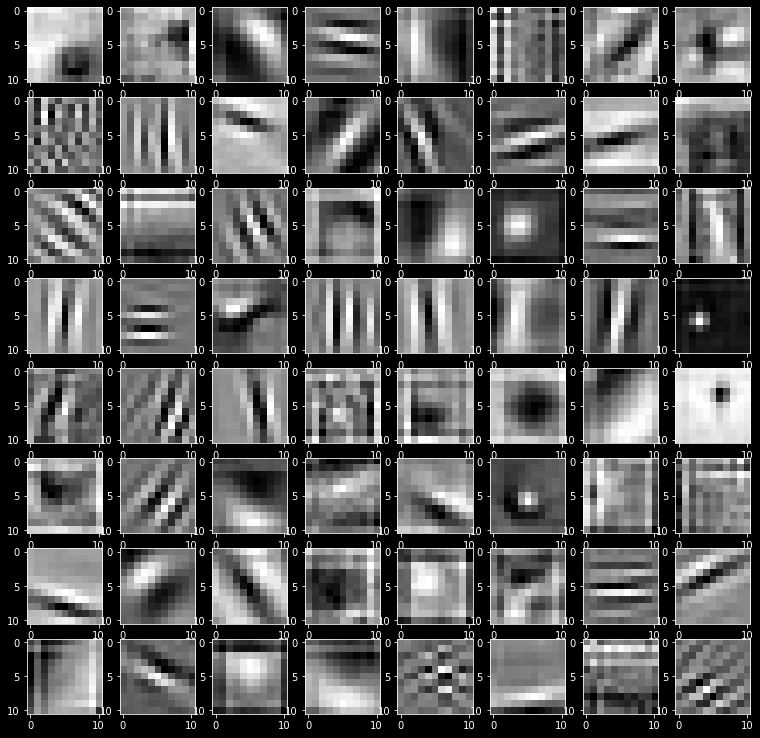

In [3]:
import matplotlib.pyplot as plt

conv1 = dict(model.features.named_children())['0']
w1 = conv1.weight.cpu().clone()
print("total of number of filter : ", len(w1))

fig, axes = plt.subplots(8, 8, figsize=(13, 13))

for i in range(8):
    for j in range(8):
        axes[i][j].imshow(w1[8*i + j, 0].detach(), cmap='gray')

In [4]:
def get_k_layer_feature_map(feature_extractor, k, x):
    with torch.no_grad():
        for index, layer in enumerate(feature_extractor):
            x = layer(x)
            if k == index:
                return x

def show_feature_map(feature_map):
    """
    画前64通道的feature map
    """
    feature_map = feature_map.squeeze(0).cpu().numpy()
    feature_map_num = feature_map.shape[0]

    fig, axes = plt.subplots(8, 8, figsize=(15, 15))
    for index in range(feature_map_num):
        if index < 64:
            axes[index // 8][index%8].imshow(feature_map[index])

In [5]:
from torchvision import transforms
from PIL import Image

image = Image.open('./cat1.jpg').convert('RGB')

image_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(227),
        transforms.ToTensor(),
    ])

image = image_transform(image).unsqueeze(0).to(device)

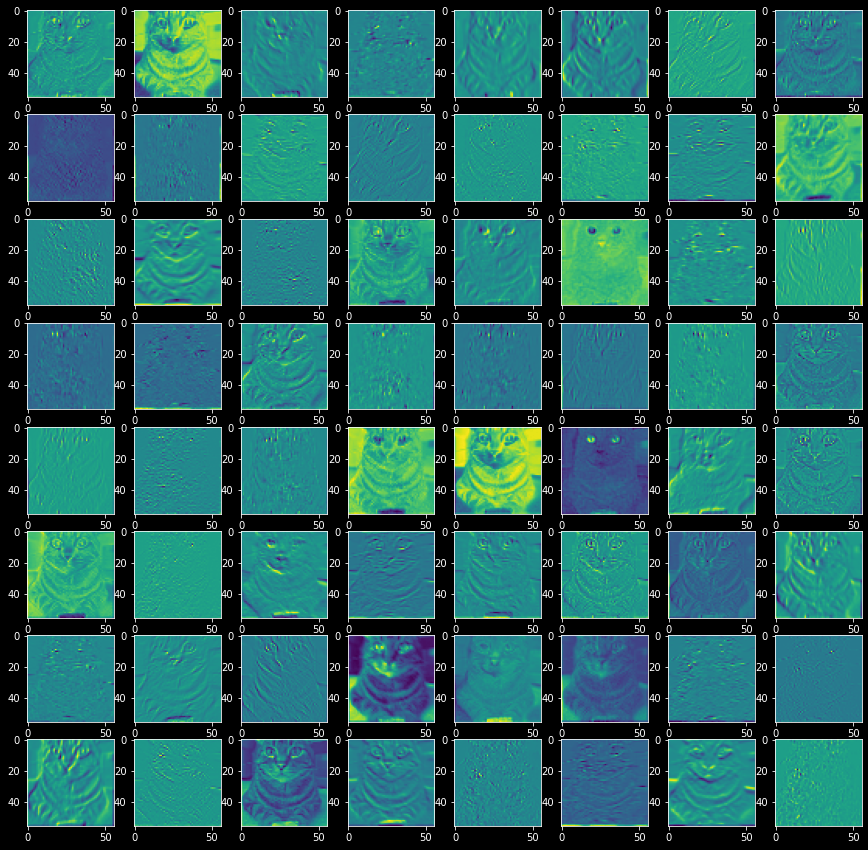

In [6]:
feature_extractor = model.features
feature_map = get_k_layer_feature_map(feature_extractor, 0, image)
show_feature_map(feature_map)